In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['KaiTi']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


In [13]:
data1 = pd.read_csv("input/data.csv")
print(data1)

    gesture  force  sg1  sg2  sg3  sg4  sg5  sg6
0         1    100   38   10  -41  -37   -2   -1
1         1    200   76   16  -77  -76   -2   -2
2         1    500  193   47 -185 -152    1   -5
3         1   1000  380   91 -374 -316    4   -8
4         3    100   43   10  -40  -30   -2   -4
5         3    200   76   18  -80  -72   -3   -7
6         3    500  200   45 -196 -171   -2   -9
7         3   1000  412   96 -402 -356    6   -7
8         5    100   43   12  -41  -38   -2   -5
9         5    200   84   22  -82  -80   -1   -6
10        5    500  213   55 -210 -197   -1  -10
11        5   1000  453  104 -431 -390    9  -11
12        7    100   46   14  -45  -40    5   -1
13        7    200   95   25  -93  -81    7   -6
14        7    500  243   58 -231 -198   16  -20
15        7   1000  487  106 -461 -414   34  -46


姿态：
$g \in Gestures$

   gesture  force  sg1  sg2  sg3  sg4  sg5  sg6
0        1    100   38   10  -41  -37   -2   -1
1        1    200   76   16  -77  -76   -2   -2
2        1    500  193   47 -185 -152    1   -5
3        1   1000  380   91 -374 -316    4   -8
   gesture  force  sg1  sg2  sg3  sg4  sg5  sg6
4        3    100   43   10  -40  -30   -2   -4
5        3    200   76   18  -80  -72   -3   -7
6        3    500  200   45 -196 -171   -2   -9
7        3   1000  412   96 -402 -356    6   -7
    gesture  force  sg1  sg2  sg3  sg4  sg5  sg6
8         5    100   43   12  -41  -38   -2   -5
9         5    200   84   22  -82  -80   -1   -6
10        5    500  213   55 -210 -197   -1  -10
11        5   1000  453  104 -431 -390    9  -11
    gesture  force  sg1  sg2  sg3  sg4  sg5  sg6
12        7    100   46   14  -45  -40    5   -1
13        7    200   95   25  -93  -81    7   -6
14        7    500  243   58 -231 -198   16  -20
15        7   1000  487  106 -461 -414   34  -46


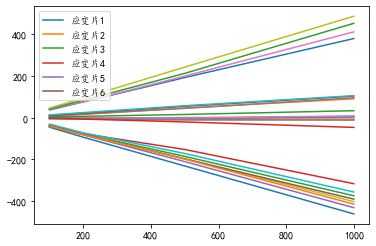

In [14]:
gestures = np.array([1, 3, 5, 7])
forces = [100, 200, 500, 1000]
sgs = np.array(['sg1', 'sg2', 'sg3', 'sg4', 'sg5', 'sg6'])
## visualize a gesture
def v_gesture(data, gesture, sgs, forces):
    ## data of this gesture
    gdata = data[data['gesture'] == gesture]
    print(gdata)
    for sg in sgs:
        plt.plot(forces, gdata[sg])
    str_legend = [str_sg.replace('sg', '应变片') for str_sg in sgs]
    plt.legend(str_legend)
    # plt.show()

for g in gestures:
    v_gesture(data1, g, sgs, forces)

`w_gesture()`：依次比较不同位置的应力，确定最危险的姿态  
`l_gesture()`:线性化不同姿态，不同位置的应力/力

In [15]:
def l_gesture(data, g, sg, forces):
    gdata = data[data['gesture'] == g]
    X = np.matrix(forces).T 
    y = np.matrix(gdata[sg]).T
    # print(X, y)
    return 1 / (X.T * X) * X.T * y * 1e-6


4 6
[[ 3.81153846e-07  4.08846154e-07  4.46615385e-07  4.86230769e-07]
 [ 9.13076923e-08  9.46923077e-08  1.05461538e-07  1.08769231e-07]
 [-3.73846154e-07 -4.00000000e-07 -4.28076923e-07 -4.61230769e-07]
 [-3.16076923e-07 -3.53000000e-07 -3.91000000e-07 -4.10153846e-07]
 [ 3.00000000e-09  3.23076923e-09  6.23076923e-09  3.37692308e-08]
 [-8.46153846e-09 -1.02307692e-08 -1.36153846e-08 -4.40769231e-08]]


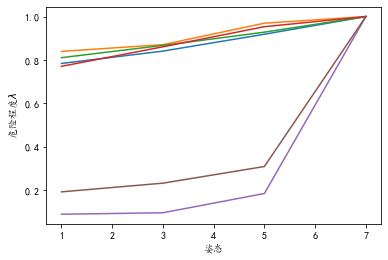

In [24]:
def w_gesture(data, gestures, sgs, forces):
    print(gestures.shape[0], sgs.shape[0])
    thetas = np.zeros([sgs.shape[0], gestures.shape[0]])
    for i, sg in enumerate(sgs):
        for j, g in enumerate(gestures):
            thetas[i, j] = l_gesture(data, g, sg, forces)
    
    print(thetas)
    for i, sg in enumerate(sgs):
        thetas_i = abs(thetas[i, :])
        plt.plot(gestures, thetas_i/np.max(thetas_i))
    plt.ylabel(r"危险程度$\lambda$")
    plt.xlabel(r"姿态")


    

w_gesture(data1, gestures, sgs ,forces)



## Now analysis data3.csv

In [25]:
sgs3 = np.array(["sg1", "sg2", "sg3", "sg4"])
gestures3 = np.arange(1, 8)
forces3 = np.array([100, 500, 1000])
print("gestures3 = ", gestures3)
data3 = pd.read_csv("input/data3.csv")
print(data3)

gestures3 =  [1 2 3 4 5 6 7]
    gesture  force  sg1  sg2  sg3  sg4
0         7    100    7    4   -7   -4
1         7    500   31   20  -31  -24
2         7   1000   65   42  -66  -50
3         4    100    8    6   -8   -7
4         4    500   40   27  -39  -30
5         4   1000   79   56  -79  -60
6         3    100   10    7  -10   -8
7         3    500   49   36  -49  -39
8         3   1000   94   67  -91  -71
9         6    100    7    8   -6   -6
10        6    500   34   29  -33  -27
11        6   1000   68   54  -67  -52
12        5    100    8    6   -9   -6
13        5    500   39   29  -40  -30
14        5   1000   77   55  -77  -60
15        1    100   12   10  -11   -8
16        1    500   51   40  -51  -40
17        1   1000  104   79 -103  -85
18        2    100   11    9  -11   -9
19        2    500   50   39  -51  -40
20        2   1000   98   75  -99  -76


    gesture  force  sg1  sg2  sg3  sg4
15        1    100   12   10  -11   -8
16        1    500   51   40  -51  -40
17        1   1000  104   79 -103  -85


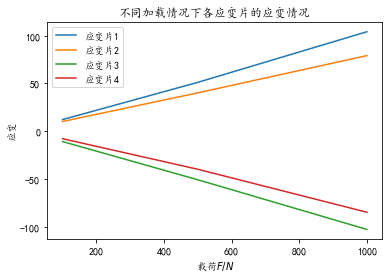

    gesture  force  sg1  sg2  sg3  sg4
18        2    100   11    9  -11   -9
19        2    500   50   39  -51  -40
20        2   1000   98   75  -99  -76


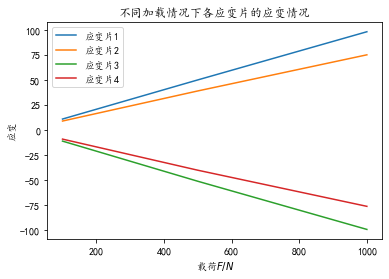

   gesture  force  sg1  sg2  sg3  sg4
6        3    100   10    7  -10   -8
7        3    500   49   36  -49  -39
8        3   1000   94   67  -91  -71


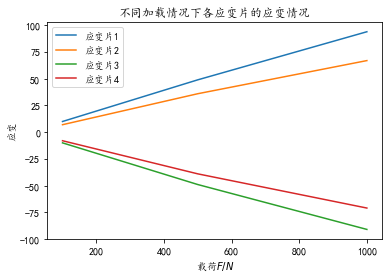

   gesture  force  sg1  sg2  sg3  sg4
3        4    100    8    6   -8   -7
4        4    500   40   27  -39  -30
5        4   1000   79   56  -79  -60


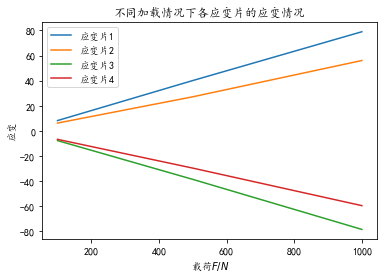

    gesture  force  sg1  sg2  sg3  sg4
12        5    100    8    6   -9   -6
13        5    500   39   29  -40  -30
14        5   1000   77   55  -77  -60


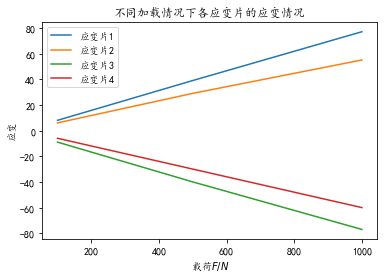

    gesture  force  sg1  sg2  sg3  sg4
9         6    100    7    8   -6   -6
10        6    500   34   29  -33  -27
11        6   1000   68   54  -67  -52


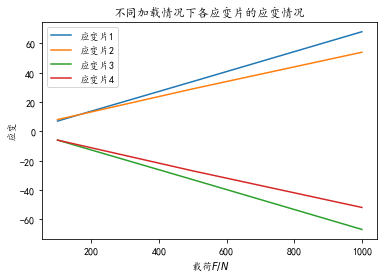

   gesture  force  sg1  sg2  sg3  sg4
0        7    100    7    4   -7   -4
1        7    500   31   20  -31  -24
2        7   1000   65   42  -66  -50


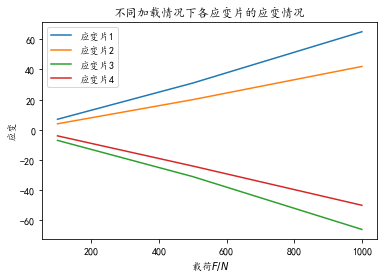

In [26]:
for g in gestures3:
    v_gesture(data3, g, sgs3, forces3)
    plt.title("不同加载情况下各应变片的应变情况")
    plt.xlabel(r"载荷$F/N$")
    plt.ylabel(r"应变")
    plt.show()

7 4
[[ 1.03730159e-07  9.84920635e-08  9.48412698e-08  7.92063492e-08
   7.72222222e-08  6.80158730e-08  6.44444444e-08]
 [ 7.93650794e-08  7.57142857e-08  6.80158730e-08  5.56349206e-08
   5.56349206e-08  5.50000000e-08  4.15873016e-08]
 [-1.02857143e-07 -9.96825397e-08 -9.24603175e-08 -7.88095238e-08
  -7.76984127e-08 -6.67460317e-08 -6.52380952e-08]
 [-8.39682540e-08 -7.69047619e-08 -7.24603175e-08 -6.00793651e-08
  -6.00000000e-08 -5.24603175e-08 -4.95238095e-08]]


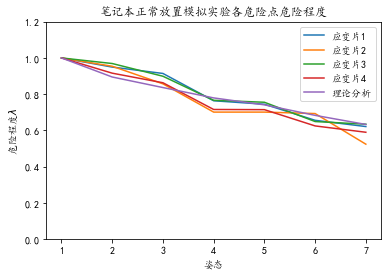

In [27]:
w_gesture(data3, gestures3, sgs3, forces3)
plt.title("笔记本正常放置模拟实验各危险点危险程度")
plt.ylim([0, 1.2])
str_legend = [str_sg.replace('sg', '应变片') for str_sg in sgs3]

# epsilon is from an excel
epsilon = np.array([5.673797477,
5.076450116,
4.746018653,
4.421774711,
4.204704032,
3.875577399,
3.590682752
])
plt.plot(gestures3, [e/epsilon.max() for e in epsilon])
plt.legend(str_legend + ["理论分析"]) 


plt.show()